In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import airtable as at
#import json

In [3]:
with open('api.txt') as f:
    lines = f.readlines()


In [4]:
api_key = lines[0]
base_key = "appuiDshjiBzOAGl2"
missions_table= "Missions"
warriors_table = "Warriors"

In [5]:
missions_cxn = at.Airtable(base_key, missions_table, api_key)
missions = missions_cxn.get_all(view = 'missions api',sort ='Task')

warriors_cxn = at.Airtable(base_key, warriors_table, api_key)
warriors = warriors_cxn.get_all(view = 'warriors api',sort ='Identifier')

In [6]:
df = pd.DataFrame.from_dict(missions)

In [7]:
df.head()

,id,fields,createdTime
0,recOeHr1fepajwSYl,"{'Created By': {'id': 'usrIlLnavjMv7VO9t', 'em...",2021-12-05T06:01:55.000Z
1,recrzNVQHp7kex7bi,"{'When Deliver': '2021-11-27', 'Task': 'Allow ...",2021-11-20T20:11:09.000Z
2,recloyi26yt6k32Bt,"{'When Deliver': '2021-11-22', 'Task': 'Analyt...",2021-11-20T23:14:02.000Z
3,recXtnhbiUpaBMKQx,"{'When Deliver': '2021-11-27', 'Task': 'API fo...",2021-11-20T20:33:26.000Z
4,recGjHMtwt2xMOWti,"{'When Deliver': '2021-11-27', 'Task': 'Build ...",2021-11-20T20:11:09.000Z


In [8]:
keys = []

for r in df.fields.values:
    keys += list(r.keys())

keys = set(keys)

In [9]:
keys

{'Bounty (GAS)',
 'Bounty Sponsors',
 'Category',
 'Created By',
 'Deliverable (link)',
 'Department',
 'Karma Points',
 'Karma Police',
 'Project',
 'Skill Level',
 'Spec',
 'Status',
 'Table 2',
 'Task',
 'Task (from dependencies)',
 'Type',
 'When Deliver',
 'When Start',
 'Worker',
 'dependencies',
 'payout notes'}

In [10]:
def flatten_details(mydf, mykeys):
    
    def expander(d, k):
        try:
            return d[k]
        except:
            return np.NaN
    
    for k in mykeys:
        mydf[k] = mydf.fields.apply(lambda d: expander(d,k))

    return mydf

In [11]:
df = flatten_details(df, keys)

In [12]:
df.head()

,id,fields,createdTime,dependencies,Bounty Sponsors,Task (from dependencies),Type,Status,Karma Police,When Start,...,Skill Level,Worker,When Deliver,Category,Table 2,Karma Points,payout notes,Task,Project,Deliverable (link)
0,recOeHr1fepajwSYl,"{'Created By': {'id': 'usrIlLnavjMv7VO9t', 'em...",2021-12-05T06:01:55.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,recrzNVQHp7kex7bi,"{'When Deliver': '2021-11-27', 'Task': 'Allow ...",2021-11-20T20:11:09.000Z,NaN,[iqlusion Engineering Program],NaN,Day,NaN,NaN,2021-11-20,...,Experienced,NaN,2021-11-27,Carpe,NaN,1.0,NaN,Allow resume mining only if there is no backlo...,Tx submission,NaN
2,recloyi26yt6k32Bt,"{'When Deliver': '2021-11-22', 'Task': 'Analyt...",2021-11-20T23:14:02.000Z,NaN,[Blockscience Research Program],NaN,Half-Day,NaN,NaN,2021-11-20,...,None Required,NaN,2021-11-22,Support,"[recO6cR4ma0w6c41t, recYCHvQsl0Hl5YBg]",1.0,NaN,Analytics project kick-off,Analytics,NaN
3,recXtnhbiUpaBMKQx,"{'When Deliver': '2021-11-27', 'Task': 'API fo...",2021-11-20T20:33:26.000Z,NaN,[Blockscience Research Program],NaN,Day,NaN,NaN,2021-11-20,...,Experienced,[gnudrew],2021-11-27,Data,"[recOwo9MDPXXWcgrv, recYCHvQsl0Hl5YBg]",1.0,Completing this task triggers payments for sev...,API for Permission Tree db,Analytics,NaN
4,recGjHMtwt2xMOWti,"{'When Deliver': '2021-11-27', 'Task': 'Build ...",2021-11-20T20:11:09.000Z,NaN,[iqlusion Engineering Program],NaN,Day,NaN,NaN,2021-11-20,...,Experienced,[jarcodallo],2021-11-27,Carpe,[recOwo9MDPXXWcgrv],1.0,NaN,Build Carpe installers on Github Actions - Mac,CI,NaN


In [13]:
categories = df.groupby("Category").count()

In [14]:
categories.head()

,id,fields,createdTime,dependencies,Bounty Sponsors,Task (from dependencies),Type,Status,Karma Police,When Start,...,Department,Skill Level,Worker,When Deliver,Table 2,Karma Points,payout notes,Task,Project,Deliverable (link)
Category,,,,,,,,,,,,,,,,,,,,,
Carpe,6,6,6,0,6,0,6,0,0,6,...,6,6,4,6,5,6,0,6,6,0
Data,7,7,7,4,7,4,7,0,0,7,...,7,7,4,7,7,7,7,7,7,0
Mod,4,4,4,0,4,0,4,0,0,4,...,4,4,4,4,4,4,0,4,4,0
Protocol,7,7,7,0,7,0,7,3,3,7,...,7,7,5,7,5,7,0,7,7,3
Support,6,6,6,0,5,0,6,0,0,6,...,6,6,4,5,6,6,0,6,6,0


In [15]:
projects = df.groupby("Project").count()

In [16]:
projects

,id,fields,createdTime,dependencies,Bounty Sponsors,Task (from dependencies),Type,Status,Karma Police,When Start,...,Department,Skill Level,Worker,When Deliver,Category,Table 2,Karma Points,payout notes,Task,Deliverable (link)
Project,,,,,,,,,,,,,,,,,,,,,
Analytics,9,9,9,4,9,4,9,0,0,9,...,9,9,5,9,9,9,9,7,9,0
Assets,3,3,3,0,3,0,3,0,0,3,...,3,3,0,3,3,1,3,0,3,0
Bridge,5,5,5,0,5,0,5,3,3,5,...,5,5,4,5,5,4,5,0,5,3
CI,2,2,2,0,2,0,2,0,0,2,...,2,2,2,2,2,2,2,0,2,0
Comms,1,1,1,0,1,0,1,0,0,1,...,1,1,1,1,1,1,1,0,1,0
Community,2,2,2,0,1,0,2,0,0,2,...,2,2,1,1,2,2,2,0,2,0
Dev,3,3,3,0,2,0,3,1,0,3,...,3,3,3,2,3,3,3,0,3,1
Discord,1,1,1,0,1,0,1,0,0,1,...,1,1,1,1,1,1,1,0,1,0
Eng Work,1,1,1,0,1,0,1,0,0,1,...,1,1,1,1,1,1,1,0,1,0


/Users/zargham/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zargham/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


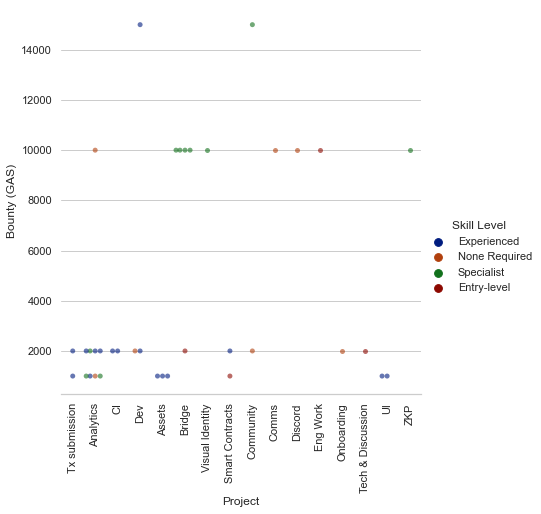

In [17]:

sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g= sns.catplot(
    data=df, kind='swarm',
    x="Project", y="Bounty (GAS)", hue="Skill Level",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.legend.set_title("Skill Level")
ax = plt.gca()
labels = ax.get_xticklabels()
ax.set_xticklabels(labels=labels, rotation=90);

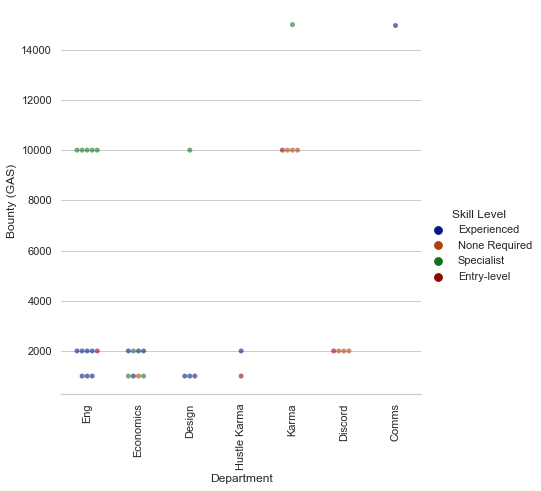

In [18]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g= sns.catplot(
    data=df, kind='swarm',
    x="Department", y="Bounty (GAS)", hue="Skill Level",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.legend.set_title("Skill Level")
ax = plt.gca()
labels = ax.get_xticklabels()
ax.set_xticklabels(labels=labels, rotation=90);

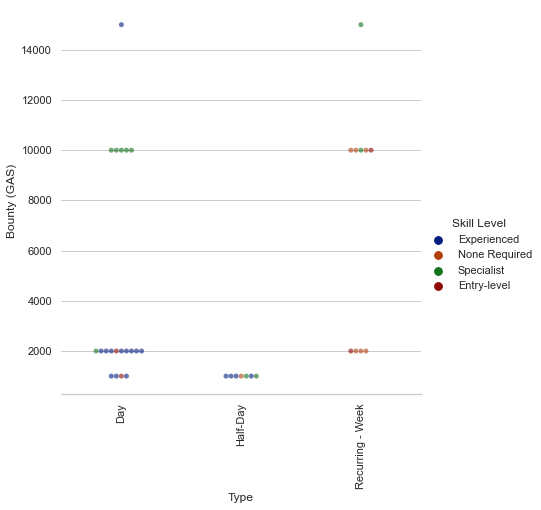

In [19]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g= sns.catplot(
    data=df, kind='swarm',
    x="Type", y="Bounty (GAS)", hue="Skill Level",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.legend.set_title("Skill Level")
ax = plt.gca()
labels = ax.get_xticklabels()
ax.set_xticklabels(labels=labels, rotation=90);